**Following are the dependencies**

In [433]:
# Importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 

In [434]:
# Loading the dataset to a Pandas DataFrame
credit_card_data = pd.read_csv('credit_data.csv')

In [435]:
# Displaying the first 5 rows of the dataset
print('The first 5 rows of the dataset:')
credit_card_data.head()

The first 5 rows of the dataset:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [436]:
# Displaying the last 5 rows of the dataset
print('The last 5 rows of the dataset:')
credit_card_data.tail()

The last 5 rows of the dataset:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In the two tables above, **V1 to V28** are some features about each particular transaction. 
But as the **credit card details are very sensitive**, the dataset provided cannot expose the details.
Hence, all the features have been converted into numerical values using **Principle Component Analysis** method.

In [437]:
# Dataset information
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [438]:
# Checking whether any missing values in each column of the dataset exist 
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [439]:
# Distribution of legit transactions and fraudulent transactions
credit_card_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Here, in the label 'Class':

> 0 --> Legit or normal transaction

> 1 --> Fraudulent transaction

As you rightly noticed, this is a **highly unbalanced dataset**, and if we feed this dataset to the machine learning model, almost everytime the model will give the output 'legit transaction'.

In [440]:
# Separating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [441]:
# Statistical measures for this data (legit transactions)
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [442]:
# Statistical measures for this data (fraudulent transactions)
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

The mean amount of the fraudulent transactions is much more as compared to the mean amount of legit transactions, which will play an important role in the further analysis.

In [443]:
# Comparing the values for both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


This difference in the means is very important for the analysis.

To deal with the unbalanced dataset, we are going to use the **Under-Sampling method**.

We know that the number of fraudulent transactions in the dataset are **492**, so we will randomly select **492** legit transactions and combine it with the fraudulent transactions to form a new sample dataset. Doing this, the **distribution will be even**.

Then we can make **better predictons** using machine learning.

In [444]:
# Randomly selecting 492 transactions from the legit transactions and concatenating two DataFrames
legit_sample = legit.sample(n=492)
new_dataset = pd.concat([legit_sample,fraud],axis=0)

In [445]:
# Displaying the first 5 rows of the new dataset
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
174605,121986.0,1.960232,0.008168,-1.583743,0.504966,0.005585,-1.301635,0.198470,-0.324685,0.955729,...,-0.221736,-0.419432,0.154904,-0.055321,-0.061943,-0.096042,-0.009605,-0.014725,41.00,0
103402,68634.0,-2.400679,2.128132,-0.881047,1.054510,0.612755,0.929672,0.009565,0.896214,-1.278733,...,0.083177,-0.010682,-0.335726,-1.746011,0.592396,-0.063752,-1.345035,-0.297590,21.99,0
46253,42703.0,-1.089086,2.073435,1.512707,3.349004,-1.276277,2.091135,-3.879250,-7.643642,-1.484188,...,-3.839348,1.220044,0.414796,0.387704,0.571806,0.244347,0.057502,0.315810,0.00,0
51633,45049.0,1.235959,0.205460,0.064665,1.192924,0.262245,0.289409,0.042296,0.038909,0.350539,...,-0.160786,-0.206988,-0.160510,-0.759018,0.776817,-0.259485,0.040027,0.006279,2.00,0
9171,13093.0,1.208676,0.105042,1.027841,0.226617,-0.747359,-0.655428,-0.416311,-0.118166,1.268490,...,-0.269740,-0.537701,0.169499,0.529794,-0.042269,0.717325,-0.087008,0.002045,4.99,0


In [446]:
# Displaying the last 5 rows of the new dataset
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [447]:
# Distribution of legit transactions and fraudulent transactions in the new dataset
new_dataset['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [448]:
# Comparing the values for both transactions in the new dataset
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,95111.591463,-0.000682,0.024637,-0.032758,-0.124013,-0.036735,-0.027274,0.050257,-0.007819,0.028941,...,0.022583,-0.036885,0.016848,0.029536,-0.015115,0.024265,-0.037870,0.018256,0.006857,89.742764
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


The above table will show us whether we got a good sample or a bad sample. Closer the values, better the sample, better the prediction.

As we are using **Supervised Learning**,

>X --> Features

>Y --> Targets/Labels

In [449]:
# Splitting the new dataset into features(X) and targets/labels(Y)
X = new_dataset.drop(columns='Class',axis=1)
Y = new_dataset['Class']
print('Features:\n',X)
print('Targets/Labels:\n',Y)

Features:
             Time        V1        V2        V3        V4        V5        V6  \
174605  121986.0  1.960232  0.008168 -1.583743  0.504966  0.005585 -1.301635   
103402   68634.0 -2.400679  2.128132 -0.881047  1.054510  0.612755  0.929672   
46253    42703.0 -1.089086  2.073435  1.512707  3.349004 -1.276277  2.091135   
51633    45049.0  1.235959  0.205460  0.064665  1.192924  0.262245  0.289409   
9171     13093.0  1.208676  0.105042  1.027841  0.226617 -0.747359 -0.655428   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8  

In [450]:
# Splitting the features and labels to training data and test data (arrays)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)
print(X.shape, X_train.shape, X_test.shape)
print(Y.shape, Y_train.shape, Y_test.shape)

(984, 30) (787, 30) (197, 30)
(984,) (787,) (197,)


Here, the **Features** get split into 
>**X_train, X_test**

And the **Labels** get split into
>**Y_train, Y_test**

For the machine learning model, we choose the **Logistic Regression** model as it is used for **Binary Classification**.

**Model training**


In [451]:
# Loading one instance of Logistic Regression model
model = LogisticRegression()

In [452]:
# Training the Logistic Regression model with training data (X_train, Y_train)
model.fit(X_train,Y_train)

C:\Users\adima\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Predicting training data

In [453]:
# Predicting all the labels corresponding X_train data
X_train_prediction = model.predict(X_train)

Accuracy score for training data

In [454]:
# Accuracy on training data by comparing the values predicted by our model (X_train_prediction) with the original values (X_train)
training_model_accuracy = accuracy_score(X_train_prediction,Y_train)

Predicting test data

In [455]:
# Predicting all the labels corresponding X_test data
X_test_prediction = model.predict(X_test)

Accuracy score for test data

In [456]:
# Accuracy on test data by comparing the values predicted by our model (X_test_prediction) with the original values (X_test)
test_model_accuracy = accuracy_score(X_test_prediction,Y_test)

In [457]:
print('The Accuracy of the Training data: {}\nIn Percentage = {}\n'.format(training_model_accuracy, training_model_accuracy*100))
print('The Accuracy of the Test data: {}\nIn Percentage = {}'.format(test_model_accuracy, test_model_accuracy*100))

The Accuracy of the Training data: 0.9504447268106735
In Percentage = 95.04447268106735

The Accuracy of the Test data: 0.9289340101522843
In Percentage = 92.89340101522842


**Graphical Representation**

In [458]:
# Creating a new DataFrame
accuracy_percentage = {
    'Model': ['Training Model','Test Model'],
    'Percentage': [training_model_accuracy*100,test_model_accuracy*100]
}
df = pd.DataFrame(accuracy_percentage)
df

,Model,Percentage
0,Training Model,95.044473
1,Test Model,92.893401


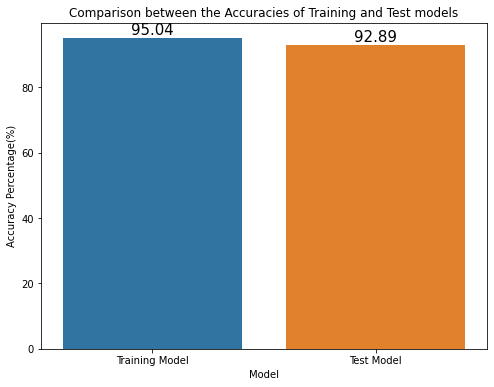

In [459]:
# Plotting the Bar graph showing the comparison between the Accuracies of Training and Test models
plt.figure(figsize=(8, 6))
plots = sns.barplot(x="Model", y="Percentage",data=df)
for bar in plots.patches:
    plots.annotate(
        format(bar.get_height(), '.2f'), (bar.get_x() + bar.get_width()/2, 
                bar.get_height()), ha='center', va='center',
                size=15, xytext=(0, 8),
                textcoords='offset points'
    )
plt.title("Comparison between the Accuracies of Training and Test models")
plt.xlabel("Model")
plt.ylabel("Accuracy Percentage(%)")
plt.show()

In [1]:
import requests
from requests.structures import CaseInsensitiveDict

In [10]:
import json
import pandas as pd

In [114]:
headers = CaseInsensitiveDict()
headers["Content-Type"] = "multipart/form-data"
headers["Api-Key"] = "187fa3a33adfd398305d2754044a9b26097eb680bc9154e5fe9a12a48ccf0074"
headers["Api-Username"] = "ptp28"

metadata = json.dumps({"limit": "ALL"})

files = {
    "\u201Climit": (None, "ALL"),
}

In [118]:
url="https://discuss.e-yantra.org/admin/plugins/explorer/queries/4/run"
resp = requests.post(url, headers=headers,data={"limit":"ALL"})

In [21]:
print(dir(resp))


['__attrs__', '__bool__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__enter__', '__eq__', '__exit__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__nonzero__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_content', '_content_consumed', '_next', 'apparent_encoding', 'close', 'connection', 'content', 'cookies', 'elapsed', 'encoding', 'headers', 'history', 'is_permanent_redirect', 'is_redirect', 'iter_content', 'iter_lines', 'json', 'links', 'next', 'ok', 'raise_for_status', 'raw', 'reason', 'request', 'status_code', 'text', 'url']
<class 'dict'>


In [22]:
# json_data = json.dumps(resp.json(),indent=1)
json_data = json.load(json_data)
json_data = json.dumps(json_data,indent=1)
json_data

AttributeError: 'str' object has no attribute 'read'

In [113]:
print(resp.json()["relations"])

{'user': [{'id': -2, 'username': 'eYBot', 'name': None, 'avatar_template': '/user_avatar/discuss.e-yantra.org/eybot/{size}/174_2.png'}, {'id': -1, 'username': 'system', 'name': None, 'avatar_template': 'https://aws1.discourse-cdn.com/business20/uploads/e_yantra/original/1X/ed0d33286128f5c2386910125d3a65a42640665f.svg'}, {'id': 1, 'username': 'codingcoffee', 'name': None, 'avatar_template': 'https://avatars.discourse-cdn.com/v4/letter/c/ee59a6/{size}.png'}, {'id': 2, 'username': 'sachinuthale', 'name': None, 'avatar_template': 'https://avatars.discourse-cdn.com/v4/letter/s/2acd7d/{size}.png'}, {'id': 3, 'username': 'deepa', 'name': None, 'avatar_template': 'https://avatars.discourse-cdn.com/v4/letter/d/91b2a8/{size}.png'}, {'id': 4, 'username': 'rishi', 'name': None, 'avatar_template': '/user_avatar/discuss.e-yantra.org/rishi/{size}/175_2.png'}, {'id': 5, 'username': 'ptp28', 'name': None, 'avatar_template': 'https://avatars.discourse-cdn.com/v4/letter/p/d6d6ee/{size}.png'}, {'id': 6, '

In [119]:
pd_frame=pd.DataFrame(resp.json()["rows"], columns = resp.json()["columns"])


In [120]:
pd_frame

,user_id,days online,posts,answers,edits to answers
0,-2,0,0,0,142.0
1,-1,0,5,5,12.0
2,1,18,0,0,1.0
3,2,23,1,5,NaN
4,3,7,2,2,1.0
...,...,...,...,...,...
5667,5672,1,0,0,NaN
5668,5673,1,0,0,NaN
5669,5674,1,0,0,NaN
5670,5675,1,0,0,NaN
